In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, confusion_matrix

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#### Exploratory Analysis

In [5]:
df = pd.read_csv('~/tf_templates/DATA/cancer_classification.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


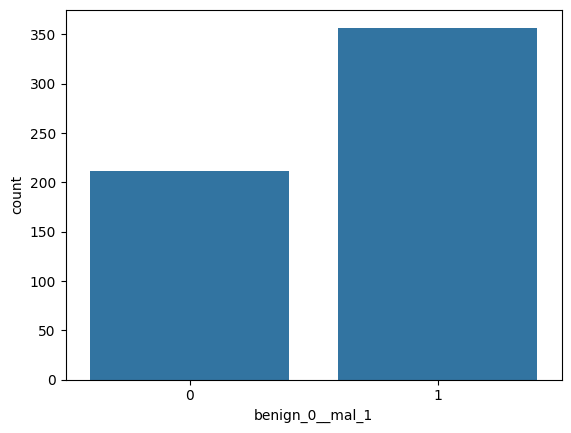

In [7]:
sns.countplot(data=df, x='benign_0__mal_1');

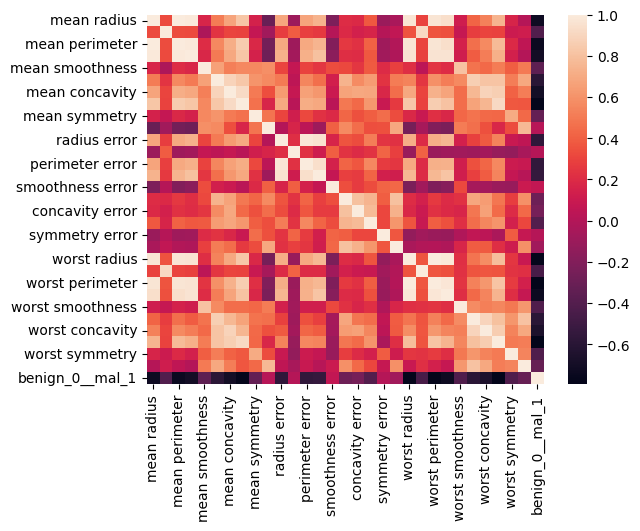

In [8]:
sns.heatmap(df.corr());

In [9]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

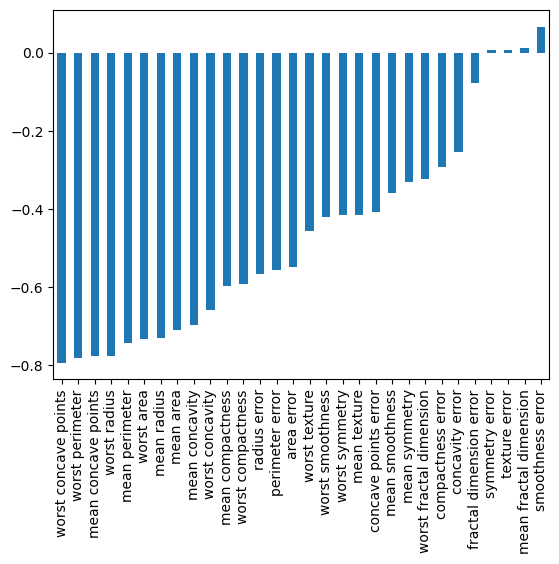

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

### Scaling and Train-Test Split

In [11]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [13]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Training the Model

In [14]:
X_train.shape

(455, 30)

In [15]:
X_test.shape

(114, 30)

### Example 1: Overfitting

In [17]:
model = Sequential([
    Input(shape=(30,)),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [20]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=16, epochs=500)

Epoch 1/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1726 - val_loss: 0.1745
Epoch 2/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1549 - val_loss: 0.1657
Epoch 3/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1469 - val_loss: 0.1628
Epoch 4/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1471 - val_loss: 0.1523
Epoch 5/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1184 - val_loss: 0.1510
Epoch 6/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1282 - val_loss: 0.1441
Epoch 7/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1040 - val_loss: 0.1415
Epoch 8/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1158 - val_loss: 0.1372
Epoch 9/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1190 - val_loss: 0.1348
Epoch 10/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1060 - val_loss: 0.1350
Epoch 11/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1021 - val_loss: 0.1319
Epoch 12/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

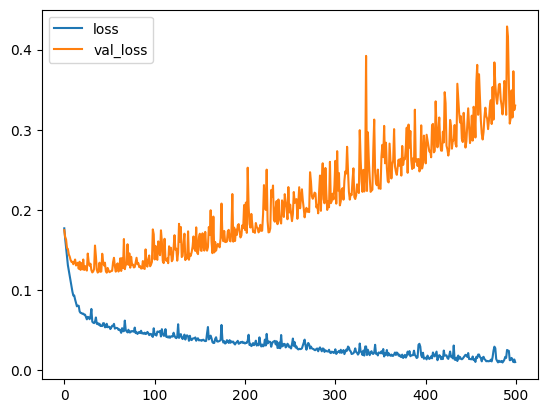

In [21]:
history = pd.DataFrame(model.history.history)
history.plot();

### Example 2: Early Stop

In [22]:
model = Sequential([
    Input(shape=(30,)),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=25)

In [25]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), callbacks=[early_stop], batch_size=16, epochs=500)

Epoch 1/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.6977 - val_loss: 0.6414
Epoch 2/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6156 - val_loss: 0.5468
Epoch 3/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5065 - val_loss: 0.4570
Epoch 4/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4334 - val_loss: 0.3678
Epoch 5/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3355 - val_loss: 0.2899
Epoch 6/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3165 - val_loss: 0.2443
Epoch 7/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2505 - val_loss: 0.2182
Epoch 8/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2285 - val_loss: 0.1921
Epoch 9/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2105 - val_loss: 0.1745
Epoch 10/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1840 - val_loss: 0.1629
Epoch 11/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1498 - val_loss: 0.1563
Epoch 12/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

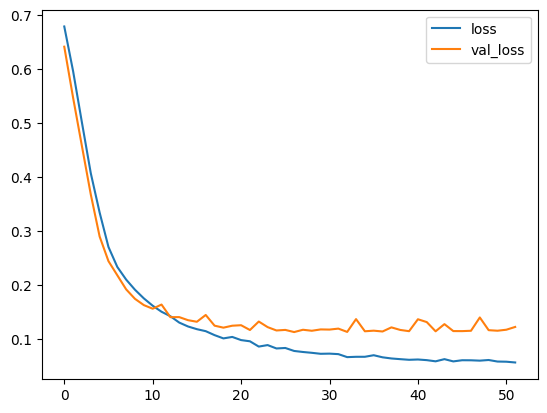

In [26]:
history = pd.DataFrame(model.history.history)
history.plot();

### Example 3: Dropout and Best Weights

In [27]:
model = Sequential([
    Input(shape=(30,)),
    Dense(units=32, activation='relu'),
    Dropout(0.3),
    Dense(units=16, activation='relu'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid')
])

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
early_stop = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

In [30]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), callbacks=[early_stop], batch_size=16, epochs=500)

Epoch 1/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.7021 - val_loss: 0.6445
Epoch 2/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6399 - val_loss: 0.5898
Epoch 3/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5900 - val_loss: 0.5337
Epoch 4/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5452 - val_loss: 0.4624
Epoch 5/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4969 - val_loss: 0.4043
Epoch 6/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4348 - val_loss: 0.3493
Epoch 7/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3618 - val_loss: 0.3013
Epoch 8/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3493 - val_loss: 0.2677
Epoch 9/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2983 - val_loss: 0.2403
Epoch 10/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2644 - val_loss: 0.2203
Epoch 11/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2768 - val_loss: 0.2052
Epoch 12/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

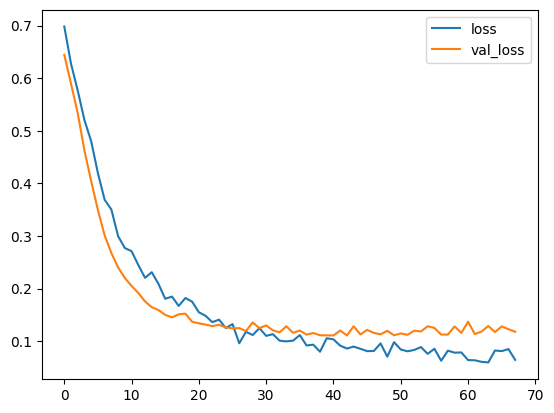

In [31]:
history = pd.DataFrame(model.history.history)
history.plot();

### Evaluation

In [32]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



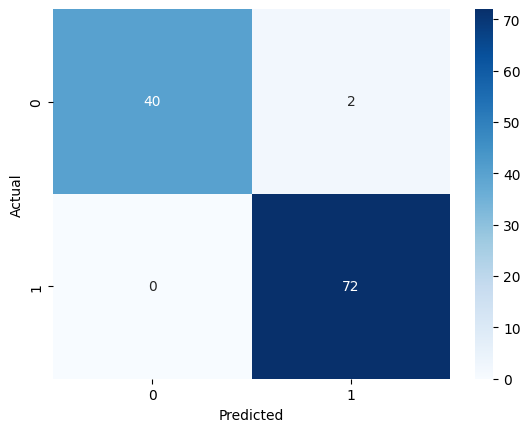

In [35]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual');

### Prediction

In [36]:
random_num = np.random.randint(100)
single_data = df.drop('benign_0__mal_1', axis=1).iloc[random_num]

In [37]:
single_data = scaler.transform(single_data.values.reshape(-1,30))

In [38]:
prediction = (model.predict(single_data) > 0.5).astype('int32')
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


array([[0]], dtype=int32)

In [39]:
df.iloc[random_num]

mean radius                  20.180000
mean texture                 23.970000
mean perimeter              143.700000
mean area                  1245.000000
mean smoothness               0.128600
mean compactness              0.345400
mean concavity                0.375400
mean concave points           0.160400
mean symmetry                 0.290600
mean fractal dimension        0.081420
radius error                  0.931700
texture error                 1.885000
perimeter error               8.649000
area error                  116.400000
smoothness error              0.010380
compactness error             0.068350
concavity error               0.109100
concave points error          0.025930
symmetry error                0.078950
fractal dimension error       0.005987
worst radius                 23.370000
worst texture                31.720000
worst perimeter             170.300000
worst area                 1623.000000
worst smoothness              0.163900
worst compactness        